In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, accuracy_score, plot_confusion_matrix, precision_score, recall_score, f1_score
from sklearn.feature_extraction.text import CountVectorizer

from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [2]:
spam = pd.read_csv('spam_eng.csv', encoding='ISO-8859-1')
spam

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [3]:
spam.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)

In [4]:
spam.isna().sum()

v1    0
v2    0
dtype: int64

In [5]:
spam.v1.value_counts(normalize=True)

ham     0.865937
spam    0.134063
Name: v1, dtype: float64

In [6]:
spam['v1'].replace({'ham':0, 'spam':1}, inplace=True)

In [7]:
spam

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


### Using vectorizer to make each word in all messages to 0 and 1

In [8]:
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(spam['v2'])
y = spam['v1']

### Train and Predict 

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=99)

In [10]:
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
y_pred_mnb = mnb.predict(X_test)
acc = accuracy_score(y_test, y_pred_mnb)
acc

0.9831430125067971

In [11]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred_dtc = dtc.predict(X_test)
acc_dtc = accuracy_score(y_test, y_pred_dtc)
acc_dtc

0.9662860250135944

In [12]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
acc_knn = accuracy_score(y_test, y_pred_knn)
acc_knn

0.9429037520391517

Text(0.5, 1.0, 'Accuracy of different model')

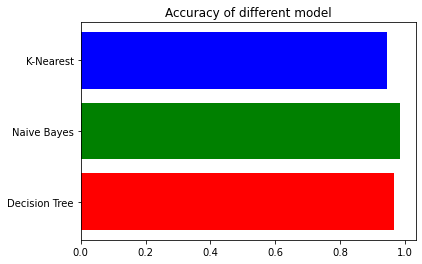

In [13]:
plt.barh(['Decision Tree', 'Naive Bayes', 'K-Nearest'], [acc_dtc, acc, acc_knn], color=['r','g','b'])
plt.title('Accuracy of different model')

### check of ham message prediction

In [14]:
example_ham = ['hi man where have you been? lets eat out somewhere']
example_vc = vectorizer.transform(example_ham)
pred = mnb.predict(example_vc)
pred, mnb.predict_proba(example_vc)

(array([0], dtype=int64), array([[9.99939920e-01, 6.00802975e-05]]))

### check of spam message prediction

In [15]:
example_spam = ['Free ticket to france! log in to http://goo.gl/s5465a to claim']
example_vcs = vectorizer.transform(example_spam)
pred_s = mnb.predict(example_vcs)
pred_s, mnb.predict_proba(example_vcs)

(array([1], dtype=int64), array([[4.56923669e-04, 9.99543076e-01]]))

In [16]:
confusion_matrix(y_test, y_pred_mnb)

array([[1571,   19],
       [  12,  237]], dtype=int64)

### Indonesian spam message

In [17]:
spam_id = pd.read_csv('spam_id.csv')
spam_id

,Teks,label
0,[PROMO] Beli paket Flash mulai 1GB di MY TELKO...,1
1,2.5 GB/30 hari hanya Rp 35 Ribu Spesial buat A...,1
2,"2016-07-08 11:47:11.Plg Yth, sisa kuota Flash ...",1
3,"2016-08-07 11:29:47.Plg Yth, sisa kuota Flash ...",1
4,4.5GB/30 hari hanya Rp 55 Ribu Spesial buat an...,1
...,...,...
1138,"Yooo sama2, oke nanti aku umumin di grup kelas",0
1139,😁 sebelumnya ga ad nulis kerudung. Kirain warn...,0
1140,Mba mau kirim 300 ya,0
1141,nama1 beaok bwrangkat pagi...mau cas atay tra...,0


In [18]:
spam_id['label'].value_counts()

1    574
0    569
Name: label, dtype: int64

In [19]:
X_id = vectorizer.fit_transform(spam_id['Teks'])
y_id = spam_id['label']

X_id_train, X_id_test, y_id_train, y_id_test = train_test_split(X_id, y_id, test_size=0.33, random_state=99)

In [20]:
dtc = DecisionTreeClassifier()
dtc.fit(X_id_train, y_id_train)
y_pred_dtc = dtc.predict(X_id_test)
acc_dtc = accuracy_score(y_id_test, y_pred_dtc)
prec_dtc = f1_score(y_id_test, y_pred_dtc)
acc_dtc, prec_dtc

(0.917989417989418, 0.9126760563380282)

In [21]:
mnb = MultinomialNB()
mnb.fit(X_id_train, y_id_train)
y_pred_mnb = mnb.predict(X_id_test)
acc = accuracy_score(y_id_test, y_pred_mnb)
prec = f1_score(y_id_test, y_pred_mnb)
acc, prec

(0.9523809523809523, 0.9502762430939227)

In [23]:
knn = KNeighborsClassifier()
knn.fit(X_id_train, y_id_train)
y_pred_knn = knn.predict(X_id_test)
acc = accuracy_score(y_id_test, y_pred_knn)
prec = f1_score(y_id_test, y_pred_knn)
acc, prec

(0.6851851851851852, 0.5102880658436214)

In [24]:
k = range(1,100,2)
testing_acc = []
testing_prec = []

for i in k:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_id_train, y_id_train)
    y_pred_knn = knn.predict(X_id_test)
    acc_knn = accuracy_score(y_id_test, y_pred_knn)
    prec_knn = f1_score(y_id_test, y_pred_knn)
    testing_acc.append(acc_knn)
    testing_prec.append(prec_knn)

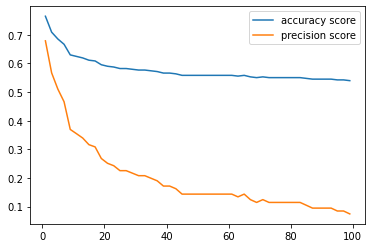

In [25]:
plt.plot(k, testing_acc, label='accuracy score')
plt.plot(k, testing_prec, label='precision score')
plt.legend()

Text(0.5, 1.0, 'Accuracy of Different Algorithm')

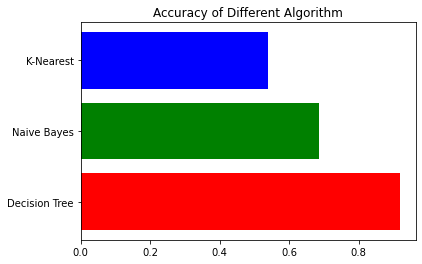

In [26]:
plt.barh(['Decision Tree', 'Naive Bayes', 'K-Nearest'], [acc_dtc, acc, acc_knn], color=['r','g','b'])
plt.title('Accuracy of Different Algorithm')

### Check of ham message prediction

In [27]:
example_ham = ['besok mau pergi kemana? mau ikut ke rumah ani ga?']
example_vc = vectorizer.transform(example_ham)
pred = mnb.predict(example_vc)
pred, mnb.predict_proba(example_vc)

(array([0], dtype=int64), array([[0.9953578, 0.0046422]]))

### Check of spam message prediction

In [28]:
example_spam = ['Maaf mengganggu waktunya kami dari koperasi menawarkan pinjaman berbasis online mudah & cepat min 5jt-250jt.']
example_vcs = vectorizer.transform(example_spam)
pred_s = mnb.predict(example_vcs)
pred_s, mnb.predict_proba(example_vcs)

(array([1], dtype=int64), array([[0.00101804, 0.99898196]]))

### Simple spam detection program 

In [29]:
input_kata = input('Pesan: ')
example_input = vectorizer.transform([input_kata])
pred_example = mnb.predict(example_input)
if pred_example == 1:
    print('Pesan spam', mnb.predict_proba(example_input))
else:
    print('Pesan bukan spam', mnb.predict_proba(example_input))

Pesan: ga kemana2? menangkan tiket ke amsterdam yuk
Pesan spam [[0.23890002 0.76109998]]
